In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset,Dataset
import matplotlib.pyplot as plt


In [6]:
train_df=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.shape

(42000, 785)

In [8]:
test_df=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_train=train_df.drop('label',axis=1).values.astype('float32')/255.0
y_train=train_df['label'].values
x_test=test_df.values.astype('float32')/255.0

In [10]:
def image_show(row):
    label=row.iloc[0]
    pixels=np.array(row.iloc[1:],dtype='uint8').reshape(28,28)
    plt.title(f"Label: {label}")
    plt.imshow(pixels, cmap='gray')
    plt.show()

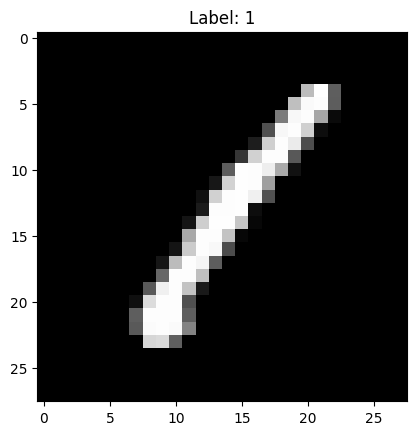

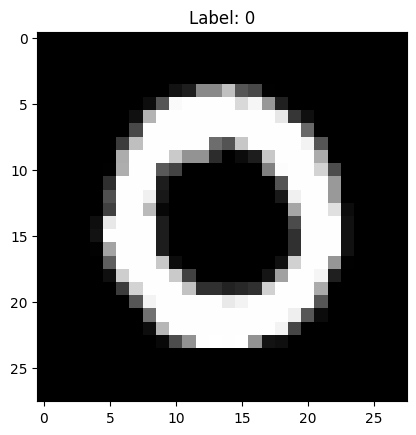

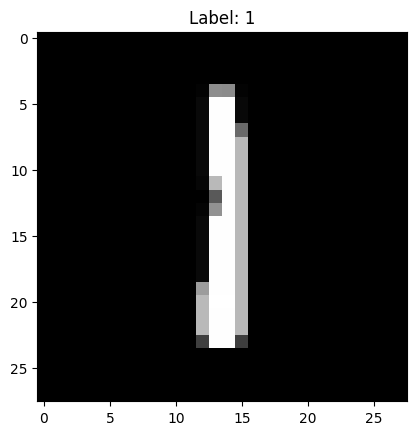

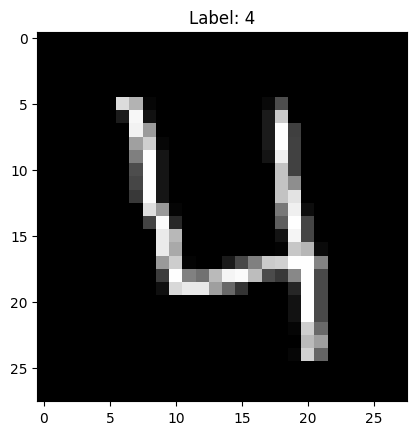

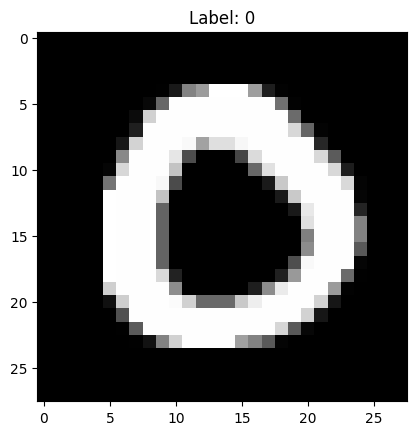

In [11]:
for i in range(5):
    image_show(train_df.iloc[i])

In [12]:
from sklearn.model_selection import train_test_split
x_train_tensor=torch.FloatTensor(x_train)
y_train_tensor=torch.LongTensor(y_train)
x_test_tensor=torch.FloatTensor(x_test)

X_train, X_val, Y_train, Y_val = train_test_split(x_train_tensor,y_train_tensor, test_size=0.2, random_state=42)

In [13]:
train_dataset=TensorDataset(X_train,Y_train)
train_loader=DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)

val_dataset=TensorDataset(X_val,Y_val)
val_loader=DataLoader(dataset=val_dataset,batch_size=64,shuffle=False)


In [64]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.model1 = nn.Sequential(
            nn.Conv2d(1, 32, 3),  # (None, 26, 26, 32)
            nn.ReLU(),
            nn.Conv2d(32, 64, 3),  # (None, 24, 24, 64)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # (None, 12, 12, 64)
            nn.Dropout(0.25),
            nn.Flatten(),  # (None, 9216)
            nn.Linear(12 * 12 * 64, 128),  # (9216 -> 128)
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)  # (128 -> 10)
        )

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        return self.model1(x)
    
model1=NN()
print(model1)

NN(
  (model1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=9216, out_features=128, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.5, inplace=False)
    (10): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [14]:

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.model2 = nn.Sequential(
            nn.Conv2d(1, 32, 3),  # (None, 26, 26, 32)
            nn.BatchNorm2d(32),   # Batch normalization after Conv1
            nn.ReLU(),
            nn.Conv2d(32, 64, 3),  # (None, 24, 24, 64)
            nn.BatchNorm2d(64),   # Batch normalization after Conv2
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # (None, 12, 12, 64)
            nn.Dropout(0.25),
            nn.Conv2d(64, 128, 3),  # (None, 10, 10, 128)
            nn.BatchNorm2d(128),  # Batch normalization after Conv3
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # (None, 5, 5, 128)
            nn.Dropout(0.25),
            nn.Flatten(),  # (None, 5*5*128 = 3200)
            nn.Linear(3200, 8192),
            nn.ReLU(),
            nn.Dropout(0.20),
            nn.Linear(8192, 1024),
            nn.ReLU(),
            nn.Linear(1024, 16384),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(16384, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)  # Reshape input
        return self.model2(x)


model2 = NN()
print(model2)


NN(
  (model2): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout(p=0.25, inplace=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=3200, out_features=8192, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.2, inplace=False)
    (17): Linear(in_features=8192, out_features=1024, bias=True

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model2.to(device)

NN(
  (model2): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout(p=0.25, inplace=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=3200, out_features=8192, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.2, inplace=False)
    (17): Linear(in_features=8192, out_features=1024, bias=True

In [17]:
def train_model(model2, train_loader, val_loader, num_epochs):
    for epoch in range(num_epochs):
        model2.train() 
        running_train_loss = 0.0
        
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            
            outputs = model2(inputs)
            loss = criterion(outputs, labels)
            
            
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()  

        
        avg_train_loss = running_train_loss / len(train_loader)
        
        
        avg_val_loss, val_accuracy = validate_model(model2, val_loader)

        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Training Loss: {avg_train_loss:.4f}, '
              f'Validation Loss: {avg_val_loss:.4f}, '
              f'Validation Accuracy: {val_accuracy:.2f}%')



def validate_model(model2, val_loader):
    model2.eval()  
    val_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():  
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model2(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()  
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_val_loss = val_loss / len(val_loader)  
    val_accuracy = 100 * correct / total  

    return avg_val_loss, val_accuracy


train_model(model2, train_loader, val_loader, num_epochs=10)

Epoch [1/10], Training Loss: 0.3847, Validation Loss: 0.0958, Validation Accuracy: 97.23%
Epoch [2/10], Training Loss: 0.0949, Validation Loss: 0.0570, Validation Accuracy: 98.33%
Epoch [3/10], Training Loss: 0.0760, Validation Loss: 0.0583, Validation Accuracy: 98.54%
Epoch [4/10], Training Loss: 0.0671, Validation Loss: 0.0560, Validation Accuracy: 98.56%


KeyboardInterrupt: 